# Model comparison

In this chapter we will compare both models and choose the better one for our application.

## 1. Load the data and the models

First we will start by loading the data and the models. Additionally, we will import the libraries we will use in this chapter.

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pickle
from preprocessing import preprocess_data

# Load the models
with open('../Models/logistic_regression_model.pkl', 'rb') as file:
    log_reg_model = pickle.load(file)

with open('../Models/random_forest_model.pkl', 'rb') as file:
    rf_model = pickle.load(file)

# Load and preprocess the data
df = pd.read_csv('../data/airlines_delay_cleaned.csv')

X_train, X_test, y_train, y_test = preprocess_data(df)



## 2. Accuracy

Now we will compare the accuracy of both models. We will use the test set for this.

In [8]:
log_reg_pred = log_reg_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

print(f'Logistic Regression Accuracy: {log_reg_accuracy}')
print(f'Random Forest Accuracy: {rf_accuracy}')



Logistic Regression Accuracy: 0.5892268230120924
Random Forest Accuracy: 0.5834804623738299


The accuracy of both models is very similar. The logistic regression model has a slightly better accuracy.

## 3. Confusion matrix

Now we will compare the confusion matrix of both models. Again, we will use the test set for this.

In [9]:
log_reg_cm = confusion_matrix(y_test, log_reg_pred)
rf_cm = confusion_matrix(y_test, rf_pred)

print(f'Logistic Regression Confusion Matrix: \n {log_reg_cm}')
print(f'Random Forest Confusion Matrix: \n {rf_cm}')



Logistic Regression Confusion Matrix: 
 [[21946  9574]
 [15088 13430]]
Random Forest Confusion Matrix: 
 [[27618  3902]
 [21105  7413]]


For the logistic regression model:

TP = 13430: The model correctly predicted that the flight would be delayed 13,430 times.
TN = 21946: The model correctly predicted that the flight would not be delayed 21,946 times.
FP = 9574: The model incorrectly predicted that the flight would be delayed 9,574 times.
FN = 15088: The model incorrectly predicted that the flight would not be delayed 15,088 times.
For the random forest model:

TP = 7413: The model correctly predicted that the flight would be delayed 7,413 times.
TN = 27618: The model correctly predicted that the flight would not be delayed 27,618 times.
FP = 3902: The model incorrectly predicted that the flight would be delayed 3,902 times.
FN = 21105: The model incorrectly predicted that the flight would not be delayed 21,105 times.

Looking at these numbers, it appears that the logistic regression model has more balanced results in terms of correctly and incorrectly predicting delays and non-delays, while the random forest model is better at correctly predicting non-delays, but performs worse in correctly predicting delays.

## 4. ROC curve

Now we will compare the ROC curve of both models. Again, we will use the test set for this.

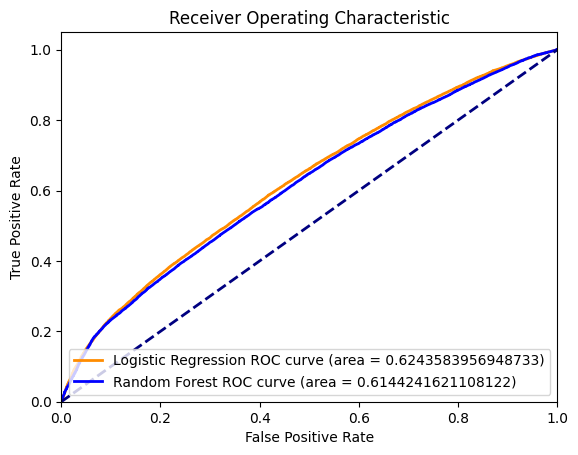

In [11]:
log_reg_proba = log_reg_model.predict_proba(X_test)[:,1]
rf_proba = rf_model.predict_proba(X_test)[:,1]

log_reg_fpr, log_reg_tpr, _ = roc_curve(y_test, log_reg_proba)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba)

log_reg_auc = auc(log_reg_fpr, log_reg_tpr)
rf_auc = auc(rf_fpr, rf_tpr)

plt.figure()
plt.plot(log_reg_fpr, log_reg_tpr, color='darkorange', lw=2, label=f'Logistic Regression ROC curve (area = {log_reg_auc})')
plt.plot(rf_fpr, rf_tpr, color='blue', lw=2, label=f'Random Forest ROC curve (area = {rf_auc})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



Both models have a very similar ROC curve. The logistic regression model has a slightly better ROC curve. However, the AUC (Area Under the Curve) of both models is very similar and close to 0.5. As a reminder, an AUC of 0.5 means that the model is not better than a random guess. this means that both our models are better than random guessing, but not by much. This is not surprising, as we saw in the previous chapter that the accuracy of both models was very similar.

## 5. Cross validation

Now we will compare the cross validation of both models. We will use the training set for this.

In [12]:
log_reg_cv_score = cross_val_score(log_reg_model, X_test, y_test, cv=5)
rf_cv_score = cross_val_score(rf_model, X_test, y_test, cv=5)

print(f'Logistic Regression CV Score: {np.mean(log_reg_cv_score)}')
print(f'Random Forest CV Score: {np.mean(rf_cv_score)}')

Logistic Regression CV Score: 0.5863620458019521
Random Forest CV Score: 0.5828809124612907


The scores for both Logistic Regression and Random Forest are around 0.58. This means that, on average, both models correctly predict whether a flight will be delayed or not about 58% of the time on unseen data. But again, the Logistic Regression model has a slightly better score.

## 6. Conclusion

In this chapter we compared the accuracy, confusion matrix, ROC curve and cross validation of both models. We saw that both models have very similar results. However, the Logistic Regression model has a slightly better accuracy, ROC curve and cross validation score. Therefore, we will choose the Logistic Regression model for our application.